In [5]:
# Load the a data set containing the numbers of votes for Buchanan
# and Bush in all 67 counties in Florida.
# install.packages('Sleuth3')
library(Sleuth3)


Warning message:
"package 'Sleuth3' was built under R version 3.6.3"

In [7]:
df <- ex0825

In [8]:
str(df)

'data.frame':	67 obs. of  3 variables:
 $ County      : chr  "Alachua" "Baker" "Bay" "Bradford" ...
 $ Buchanan2000: int  262 73 248 65 570 789 90 182 270 186 ...
 $ Bush2000    : int  34062 5610 38637 5413 115185 177279 2873 35419 29744 41745 ...


In [9]:
attach(df)

In [10]:
County

[1] "Alachua"      "Baker"        "Bay"          "Bradford"     "Brevard"     
 [6] "Broward"      "Calhoun"      "Charlotte"    "Citrus"       "Clay"        
[11] "Collier"      "Columbia"     "Dade"         "De Soto"      "Dixie"       
[16] "Duval"        "Escambia"     "Flagler"      "Franklin"     "Gadsden"     
[21] "Gilchrist"    "Glades"       "Gulf"         "Hamilton"     "Hardee"      
[26] "Hendry"       "Hernando"     "Highlands"    "Hillsborough" "Holmes"      
[31] "Indian River" "Jackson"      "Jefferson"    "Lafayette"    "Lake"        
[36] "Lee"          "Leon"         "Levy"         "Liberty"      "Madison"     
[41] "Manatee"      "Marion"       "Martin"       "Monroe"       "Nassau"      
[46] "Okaloosa"     "Okeechobee"   "Orange"       "Osceola"      "Pasco"       
[51] "Pinellas"     "Polk"         "Putnam"       "St. Johns"    "St. Lucie"   
[56] "Santa Rosa"   "Sarasota"     "Seminole"     "Sumter"       "Suwannee"    
[61] "Taylor"       "Union"        "Volusia"      "Wakulla"      "Walton"      
[66] "Washington"   "Palm Beach"

In [11]:
Buchanan2000

[1]  262   73  248   65  570  789   90  182  270  186  122   89  561   36   29
[16]  650  504   83   33   39   29    9   71   24   30   22  242   99  836   76
[31]  105  102   29   10  289  305  282   67   39   29  272  563  108   47   90
[46]  267   43  446  145  570 1010  538  147  229  124  311  305  194  114  108
[61]   27   26  396   46  120   88 3407

In [12]:
Bush2000

[1]  34062   5610  38637   5413 115185 177279   2873  35419  29744  41745
[11]  60426  10964 289456   4256   2698 152082  73029  12608   2448   4750
[21]   3300   1840   3546   2153   3764   4743  30646  20196 176967   4985
[31]  28627   9138   2481   1669  49963 106141  39053   6860   1316   3038
[41]  57948  55135  33864  16059  16404  52043   5058 134476  26216  68581
[51] 184312  90101  13439  39497  34705  36248  83100  75293  12126   8014
[61]   4051   2326  82214   4511  12176   4983 152846

In [13]:
head(df)

County,Buchanan2000,Bush2000
Alachua,262,34062
Baker,73,5610
Bay,248,38637
Bradford,65,5413
Brevard,570,115185
Broward,789,177279


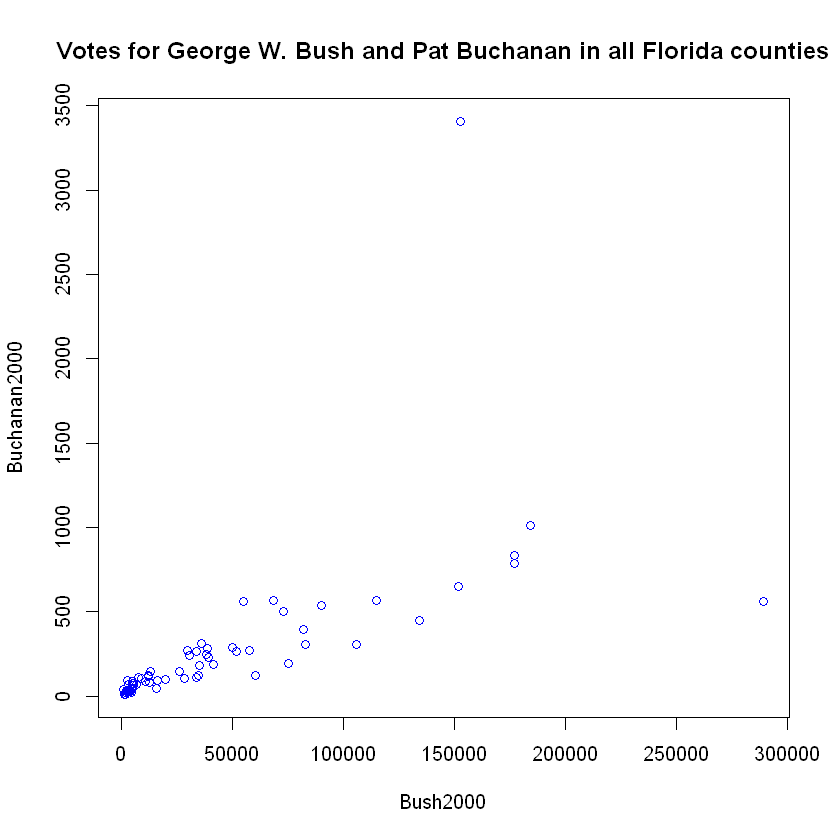

In [20]:
plot(Bush2000, Buchanan2000, col = "blue", 
     main = "Votes for George W. Bush and Pat Buchanan in all Florida counties") # scatter plots


In [38]:
library(ggplot2)
library(ggrepel)

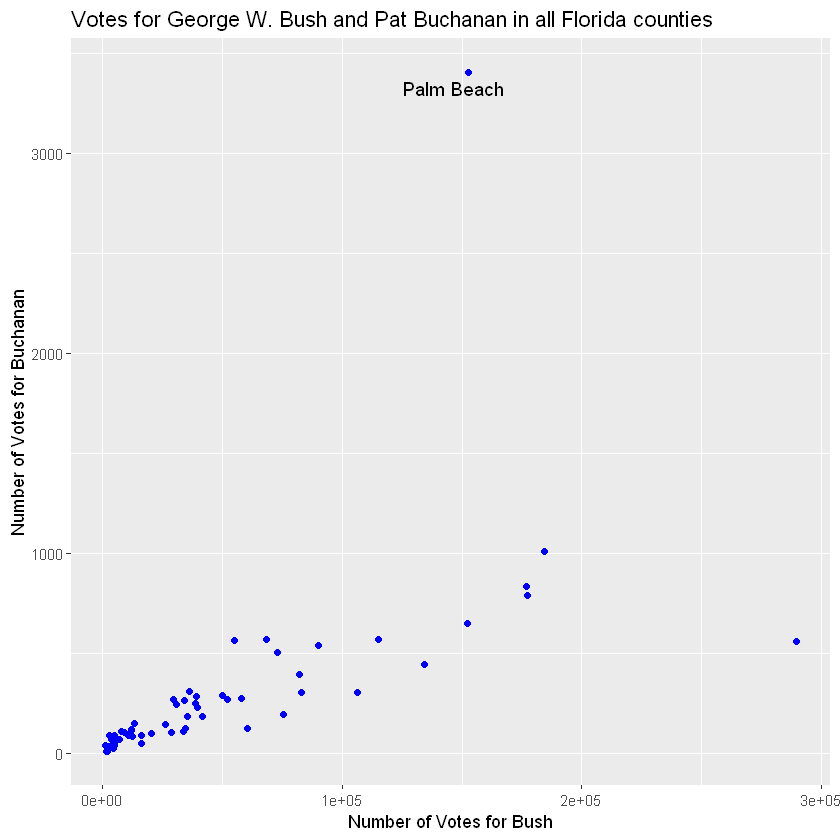

In [37]:
plot1 <- ggplot(df, aes(x = Bush2000, y = Buchanan2000)) +
    geom_point(color = " blue") +
    geom_text_repel(aes(label = County), size = 4, data = subset(df, Buchanan2000 > 3000)) +
    labs(title = "Votes for George W. Bush and Pat Buchanan in all Florida counties", 
       x="Number of Votes for Bush", y="Number of Votes for Buchanan") 
plot1 # Scatter plot

# Clearly, it shows that the value from Palm Beach is a potential outlier.

In [43]:
# filter the data from Palm Beach County
library(tidyverse)
df1 <- df %>%
filter(County !="Palm Beach")

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1       v purrr   0.3.2  
v tidyr   0.8.3       v dplyr   0.8.0.1
v readr   1.3.1       v stringr 1.4.0  
v tibble  2.1.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [44]:
str(df1)

'data.frame':	66 obs. of  3 variables:
 $ County      : chr  "Alachua" "Baker" "Bay" "Bradford" ...
 $ Buchanan2000: int  262 73 248 65 570 789 90 182 270 186 ...
 $ Bush2000    : int  34062 5610 38637 5413 115185 177279 2873 35419 29744 41745 ...


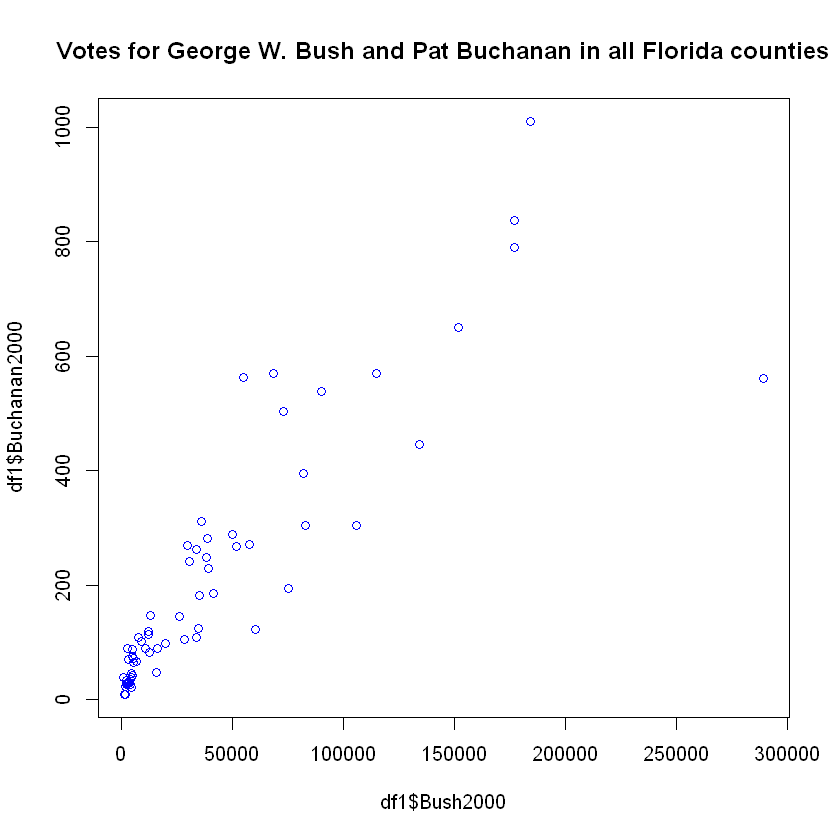

In [45]:
plot(df1$Bush2000, df1$Buchanan2000, col = "blue", 
     main = "Votes for George W. Bush and Pat Buchanan in all Florida counties") # scatter plots

# Task 2: Analyze the data without Palm Beach County results to obtain an equation for predicting Buchanan votes from Bush votes.

In [46]:
# fit Linear REgression
fit <- lm(Buchanan2000~Bush2000, data = df1)

In [47]:
summary(fit)


Call:
lm(formula = Buchanan2000 ~ Bush2000, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-512.43  -47.97  -17.09   41.78  305.45 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.557e+01  1.733e+01   3.784 0.000343 ***
Bush2000    3.482e-03  2.501e-04  13.923  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 112.5 on 64 degrees of freedom
Multiple R-squared:  0.7518,	Adjusted R-squared:  0.7479 
F-statistic: 193.8 on 1 and 64 DF,  p-value: < 2.2e-16


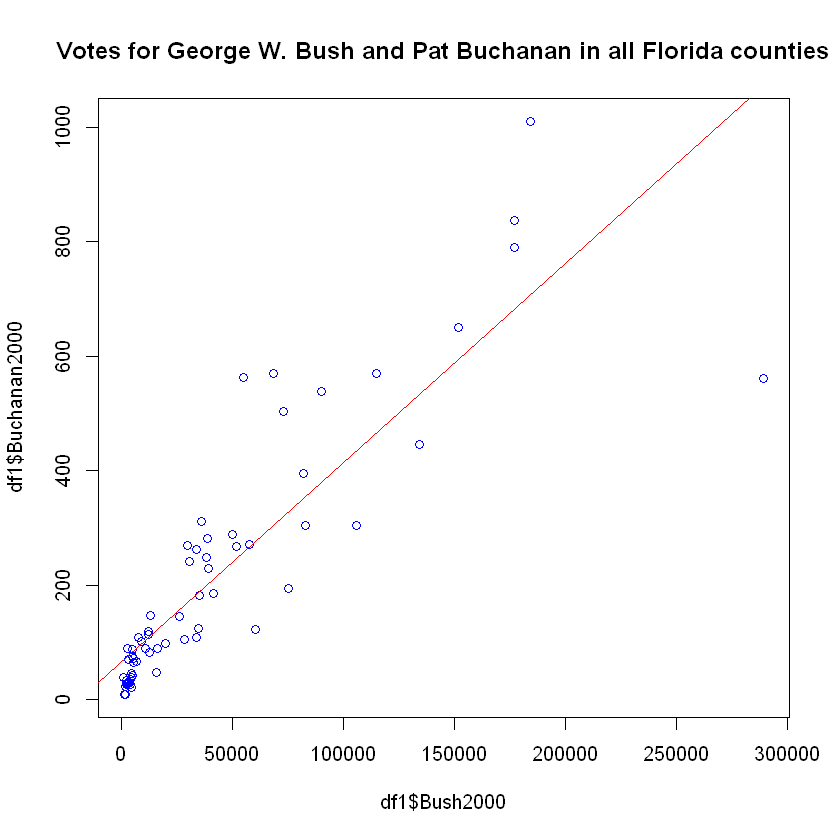

In [49]:
# plot fitted line with scatter plots
plot(df1$Bush2000, df1$Buchanan2000, col = "blue", main = "Votes for George W. Bush and Pat Buchanan in all Florida counties")
abline(a=fit$coefficients[1],b=fit$coefficients[2], col = "red")

## Obtain a 95% prediction interval for the number of Buchanan votes in Palm Beach from this result—assuming the relationship is the same in this county as in the others.

In [62]:
# find corresponding number of Bush votes in Palm Beach
df%>%
filter(County =="Palm Beach")

County,Buchanan2000,Bush2000
Palm Beach,3407,152846


In [61]:
# Prediction and Interval
predict(fit, data.frame(Bush2000 = 152846),
        interval = "prediction", level = .95)

fit,lwr,upr
597.7677,364.709,830.8264


## If it is assumed that Buchanan’s actual count contains a number of votes intended for Gore, what can be said about the likely size of this number from the prediction interval? (Consider transformation.)

## In that case, Buchanan votes would be expeted to be at least bigger than 831.(with 95% confidence)
## Since Buchanan votes from Pam Beach was 3407>831. There is statistical evidence to show that Buchanan's actual count contains a number of votes intended for Gore or some other reasons.

In [69]:
# Lets Try log transformation
logBush = log(df$Bush2000)
logBuch = log(df$Buchanan2000)

In [66]:
fit1 <- lm(df$Buchanan2000~logBush)

In [67]:
summary(fit1)


Call:
lm(formula = df$Buchanan2000 ~ logBush)

Residuals:
    Min      1Q  Median      3Q     Max 
-347.81 -158.44  -14.12   66.70 2777.48 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1424.9      312.5  -4.560 2.32e-05 ***
logBush        172.1       31.6   5.446 8.45e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 375.2 on 65 degrees of freedom
Multiple R-squared:  0.3133,	Adjusted R-squared:  0.3028 
F-statistic: 29.66 on 1 and 65 DF,  p-value: 8.45e-07


In [70]:
fit2 <-lm(logBuch~logBush)
summary(fit2)


Call:
lm(formula = logBuch ~ logBush)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.96075 -0.25949  0.01282  0.23826  1.66564 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.57712    0.38919  -6.622 8.04e-09 ***
logBush      0.75772    0.03936  19.251  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4673 on 65 degrees of freedom
Multiple R-squared:  0.8508,	Adjusted R-squared:  0.8485 
F-statistic: 370.6 on 1 and 65 DF,  p-value: < 2.2e-16


In [71]:
fit3<- lm(logBuch~df$Bush2000)
summary(fit3)


Call:
lm(formula = logBuch ~ df$Bush2000)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5029 -0.4693  0.0841  0.5072  1.5205 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.130e+00  1.185e-01  34.844  < 2e-16 ***
df$Bush2000 1.625e-05  1.663e-06   9.769 2.24e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.77 on 65 degrees of freedom
Multiple R-squared:  0.5948,	Adjusted R-squared:  0.5886 
F-statistic: 95.43 on 1 and 65 DF,  p-value: 2.24e-14


## log-transformation on both features provides better R-square value.

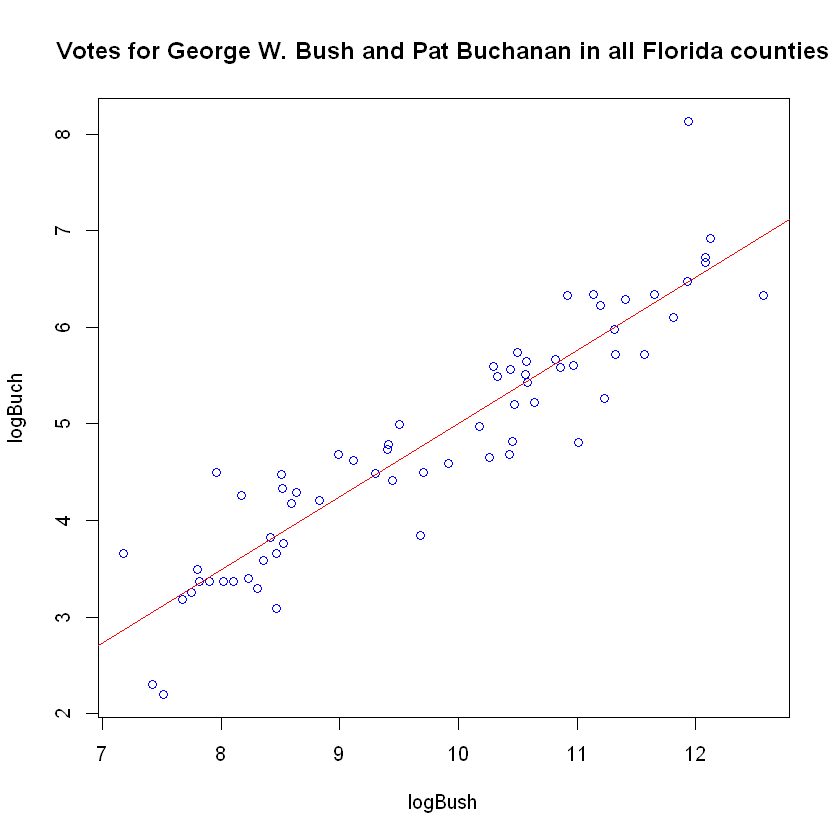

In [72]:
# scattor plot
# plot fitted line with scatter plots
plot(logBush, logBuch, col = "blue", main = "Votes for George W. Bush and Pat Buchanan in all Florida counties")
abline(a=fit2$coefficients[1],b=fit2$coefficients[2], col = "red")